In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import model_evaluation
import network_model_evaluation
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from pymongo import MongoClient

In [3]:
df = pd.read_csv(r'C:\Users\Wiktoria\Desktop\Python Basics\Project4\wine_quality_data.csv')

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
pd.set_option('display.max_columns', None)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,1.002994,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.035567,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.202600,4.010000,2.000000,14.900000,8.000000


In [7]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0.5, 1.0, 'Value Counts By Wine Quality')

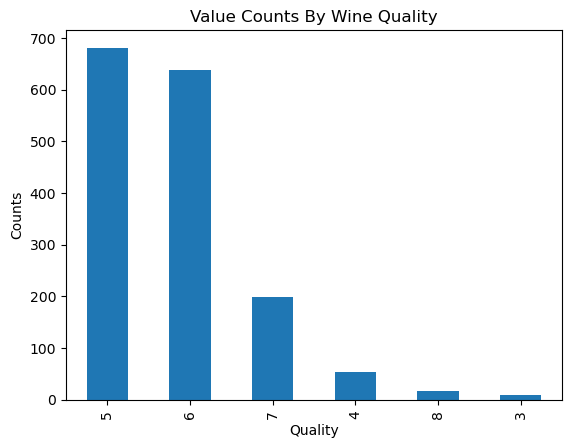

In [8]:
plt.figure()
df['quality'].value_counts().plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.title('Value Counts By Wine Quality')

In [9]:
#removal of classes 3 and 8 - very low number of records compared to the others
class_to_drop = df[(df['quality'] == 3) | (df['quality'] == 8)].index

In [10]:
df = df.drop(class_to_drop)

In [11]:
X = df.drop(columns='quality')

In [12]:
y = df['quality']

In [13]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
Name: count, dtype: int64

In [14]:
#oversampling on class 4
sampling_strategy = {4:200}

In [15]:
oversampler = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

In [16]:
X, y = oversampler.fit_resample(X, y)
y.value_counts()

quality
5    681
6    638
4    200
7    199
Name: count, dtype: int64

In [17]:
#undersampling for classes 5 and 6
undersampling_strategy = {5: 200, 6:200}

In [18]:
undersampler = RandomUnderSampler(sampling_strategy=undersampling_strategy,
                                  random_state=42)

In [19]:
X, y = undersampler.fit_resample(X, y)
y.value_counts() #200, 200, 200, 199

quality
4    200
5    200
6    200
7    199
Name: count, dtype: int64

In [20]:
df_resampled = X
df_resampled['quality'] = y

In [21]:
df_resampled.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.332403,0.667219,0.090446,0.070721,-0.064401,-0.079158,0.355730,-0.687689,0.200670,-0.054029,0.236068
volatile acidity,-0.332403,1.000000,-0.617141,-0.050696,0.045741,-0.134912,-0.046301,-0.044725,0.339979,-0.302387,-0.231863,-0.546412
citric acid,0.667219,-0.617141,1.000000,0.158940,0.256816,0.066488,0.113936,0.204009,-0.597671,0.377688,0.156145,0.372381
residual sugar,0.090446,-0.050696,0.158940,1.000000,-0.009908,0.103349,0.213198,0.174364,-0.079206,-0.033868,0.163575,0.053377
chlorides,0.070721,0.045741,0.256816,-0.009908,1.000000,0.020004,0.061988,0.013183,-0.293475,0.451494,-0.237242,-0.102393
free sulfur dioxide,-0.064401,-0.134912,0.066488,0.103349,0.020004,1.000000,0.686623,0.006166,-0.005504,0.152002,-0.037348,0.086947
total sulfur dioxide,-0.079158,-0.046301,0.113936,0.213198,0.061988,0.686623,1.000000,0.044134,-0.108625,0.158330,-0.122221,-0.014473
density,0.355730,-0.044725,0.204009,0.174364,0.013183,0.006166,0.044134,1.000000,-0.144947,0.052792,-0.021447,0.077809
pH,-0.687689,0.339979,-0.597671,-0.079206,-0.293475,-0.005504,-0.108625,-0.144947,1.000000,-0.320112,0.183871,-0.187681
sulphates,0.200670,-0.302387,0.377688,-0.033868,0.451494,0.152002,0.158330,0.052792,-0.320112,1.000000,0.070063,0.290759


In [22]:
corr = df_resampled.corr()

<Axes: >

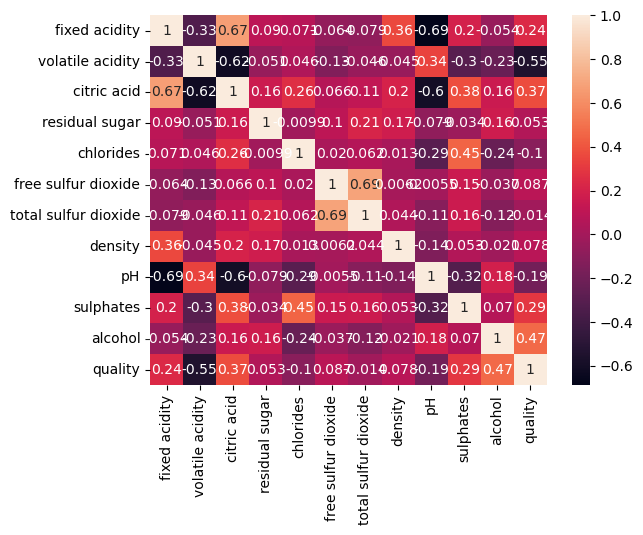

In [23]:
plt.figure()
sns.heatmap(corr, annot=True)

In [24]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)

In [27]:
X_test_scaled = scaler.transform(X_test)

In [28]:
#logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train_scaled, y_train)

LogisticRegression()

Model: Logistic Regression - Train
Confusion matrix
[[155   0   0   0]
 [  3 144   0   0]
 [  0   0 154   1]
 [  0   0   0 142]]
Classification report
              precision    recall  f1-score   support

           4       0.98      1.00      0.99       155
           5       1.00      0.98      0.99       147
           6       1.00      0.99      1.00       155
           7       0.99      1.00      1.00       142

    accuracy                           0.99       599
   macro avg       0.99      0.99      0.99       599
weighted avg       0.99      0.99      0.99       599

Accuracy: 0.993322203672788
Model: Logistic Regression - Test
Confusion matrix
[[45  0  0  0]
 [ 0 53  0  0]
 [ 0  1 44  0]
 [ 0  0  0 57]]
Classification report
              precision    recall  f1-score   support

           4       1.00      1.00      1.00        45
           5       0.98      1.00      0.99        53
           6       1.00      0.98      0.99        45
           7       1.00      1.00  

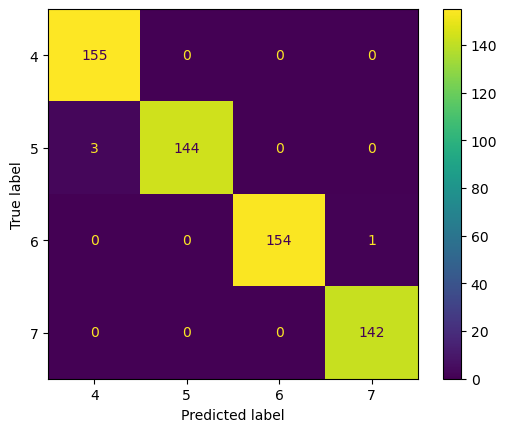

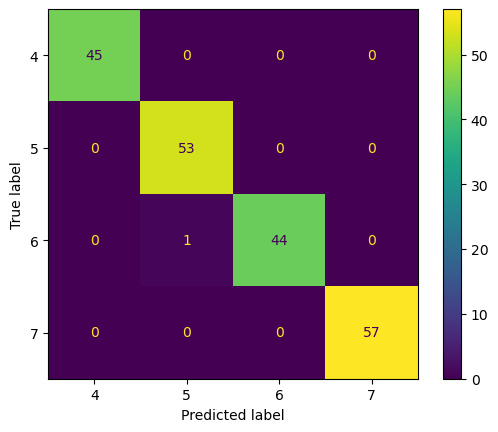

In [29]:
#preds = modelLR.predict(X_test_scaled)

model_evaluation.evaluate(modelLR, X_train_scaled, 
                          y_train,'Logistic Regression - Train')
model_evaluation.evaluate(modelLR, X_test_scaled, 
                          y_test,'Logistic Regression - Test')

In [30]:
#label range shift
y_train_shifted = y_train - 4
y_test_shifted = y_test - 4

In [31]:
#labels conversion to one-hot vectors
y_train_one_hot = to_categorical(y_train_shifted)
y_test_one_hot = to_categorical(y_test_shifted)

In [32]:
#check the shape of labels
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(599, 4)
(200, 4)


In [33]:
#neural network
def create_model():
    #input layer
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(5, activation='relu', input_shape = (X_train_scaled.shape[1], )))
    #hidden layers
    model.add(tf.keras.layers.Dense(4, activation='relu'))
    model.add(tf.keras.layers.Dense(3, activation='relu'))
    #output layer
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

In [34]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 65        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [35]:
#model training
history = model.fit(X_train_scaled, y_train_one_hot, 
                    validation_data=(X_test_scaled, y_test_one_hot), epochs=100, verbose=1)

Epoch 1/100
19/19 [==============================] - 1s 20ms/step - loss: 1.3816 - accuracy: 0.2705 - val_loss: 1.3834 - val_accuracy: 0.2400
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 1.3794 - accuracy: 0.2855 - val_loss: 1.3815 - val_accuracy: 0.2400
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 1.3766 - accuracy: 0.2888 - val_loss: 1.3786 - val_accuracy: 0.2700
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 1.3734 - accuracy: 0.3088 - val_loss: 1.3757 - val_accuracy: 0.2600
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 1.3685 - accuracy: 0.3472 - val_loss: 1.3703 - val_accuracy: 0.3150
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 1.3620 - accuracy: 0.3873 - val_loss: 1.3617 - val_accuracy: 0.3550
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 1.3457 - accuracy: 0.4925 - val_loss: 1.3462 - val_accuracy: 0.4500
Epoch 8/100


Text(0.5, 1.0, 'Loss curve during model training')

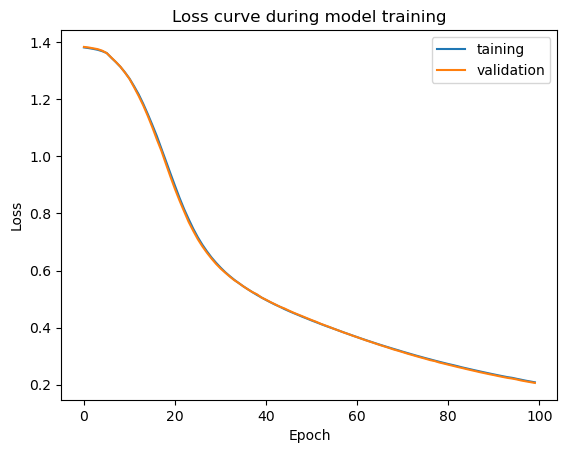

In [36]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['taining', 'validation'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss curve during model training')

Text(0.5, 1.0, 'Accuracy curve during model training')

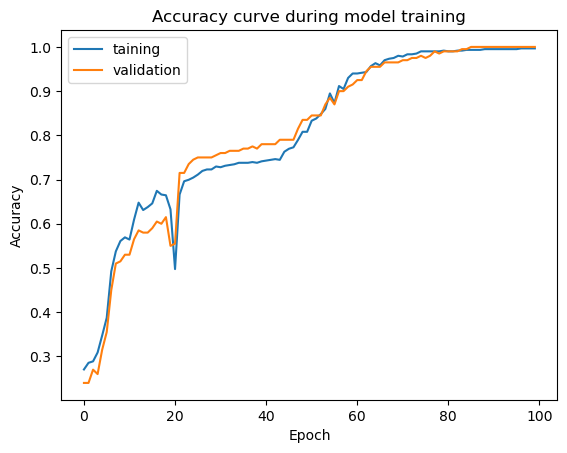

In [37]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['taining', 'validation'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy curve during model training')

In [38]:
network_model_evaluation.evaluate(model, X_train_scaled, X_test_scaled,
                                          y_train_one_hot, y_test_one_hot)

7/7 [==============================] - 0s 1ms/step
Confusion matrix for training set
[[155   0   0   0]
 [  0 147   0   0]
 [  0   0 153   2]
 [  0   0   0 142]]
Classification report for training set
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       155
           5       1.00      1.00      1.00       147
           6       1.00      0.99      0.99       155
           7       0.99      1.00      0.99       142

    accuracy                           1.00       599
   macro avg       1.00      1.00      1.00       599
weighted avg       1.00      1.00      1.00       599

Accuracy for training set: 0.996661101836394
Confusion matrix for test set
[[45  0  0  0]
 [ 0 53  0  0]
 [ 0  0 45  0]
 [ 0  0  0 57]]
Classification report for test set
              precision    recall  f1-score   support

           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00        53
           6       1.00      1

In [39]:
def save_to_db(data, database_name='wine_quality_database', collection_name='wine_quality'):

    client = MongoClient('mongodb://localhost:27017/')
    db = client[database_name]
    collection = db[collection_name] 
    
    
    collection.insert_many(data)
    
    for doc in collection.find():   
        print(doc)


In [40]:
#data = df_resampled.to_dict('records')
#save_to_db(data)